# Multi Label Classification 

Sur des images, il est fortement possible que vous n'ayez pas qu'une seule prédiction à faire. C'est ce que nous allons voir avec cet exemple d'images satellitaires où le but de l'algorithme va être d'essayer de décrire ce qu'il voir sur l'image 

1. Importez le module ```fastai.vision```

In [0]:
from fastai.vision import *

2. Nous allons cette fois nous attaquer au dataset ```URLs.PLANET_TINY``` qui est une série d'images satellitaires. Via la fonction ```untar_data``` importez le dataset

In [0]:
path = untar_data(URLs.PLANET_TINY)
path

PosixPath('/root/.fastai/data/planet_tiny')

3. Pour des images satellitaires qui sont par définition prises depuis le ciel, nous devons faire un preprocessing assez spécifique. Utilisez la fonction ```get_transform()``` dans laquelle vous spécifierez en paramètres ```flip_vert=True```, ```max_lighting=0.1```, ```max_zoom=1.05``` et ```max_warp=0```)

Stockez ceci dans une variable ```planet_tfms```

In [0]:
planet_tfms=get_transforms(flip_vert=True,max_lighting=0.1,max_zoom=1.05,max_warp=0)

4. Il est important de savoir ce que contient notre dataset, pour cela, utilisez la fonction ```glob("*/")``` qui pourra nous donner la liste de tout ce que contient notre dataset 

In [0]:
list(path.glob("*/"))
f_csv=path/"labels.csv"
f_csv

PosixPath('/root/.fastai/data/planet_tiny/labels.csv')

5. Regardez ce qu'il y a à l'intérieur de votre fichier ```labels.csv```. Vous pourrez utiliser ```pd.read_csv()``` de Pandas

In [0]:
import pandas as pd
import pathlib
pd.read_csv(f_csv)

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary
5,train_28430,agriculture clear cultivation primary road
6,train_4788,cloudy
7,train_95,clear primary
8,train_28156,artisinal_mine clear primary road water
9,train_20341,partly_cloudy primary


In [0]:
type(f_csv)

pathlib.PosixPath

6. On va pouvoir créer un ```DataBunch``` avec chacune de nos images. De la même manière que dans le premier exercice, créez un ```ImageDataBunch``` mais cette fois depuis un fichier CSV

In [0]:
data=ImageDataBunch.from_csv(path,
                             folder="train",
                             label_delim=" ",
                             suffix=".jpg",
                             csv_labels="labels.csv",
                             ds_tfms= planet_tfms,
                             size=180).normalize(imagenet_stats)

data

ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180)
y: MultiCategoryList
clear;primary,agriculture;clear;primary;road,clear;primary,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180)
y: MultiCategoryList
clear;primary,clear;primary,clear;primary,clear;primary,agriculture;clear;habitation;primary;road
Path: /root/.fastai/data/planet_tiny;

Test: None

7. Regardez un batch de données 

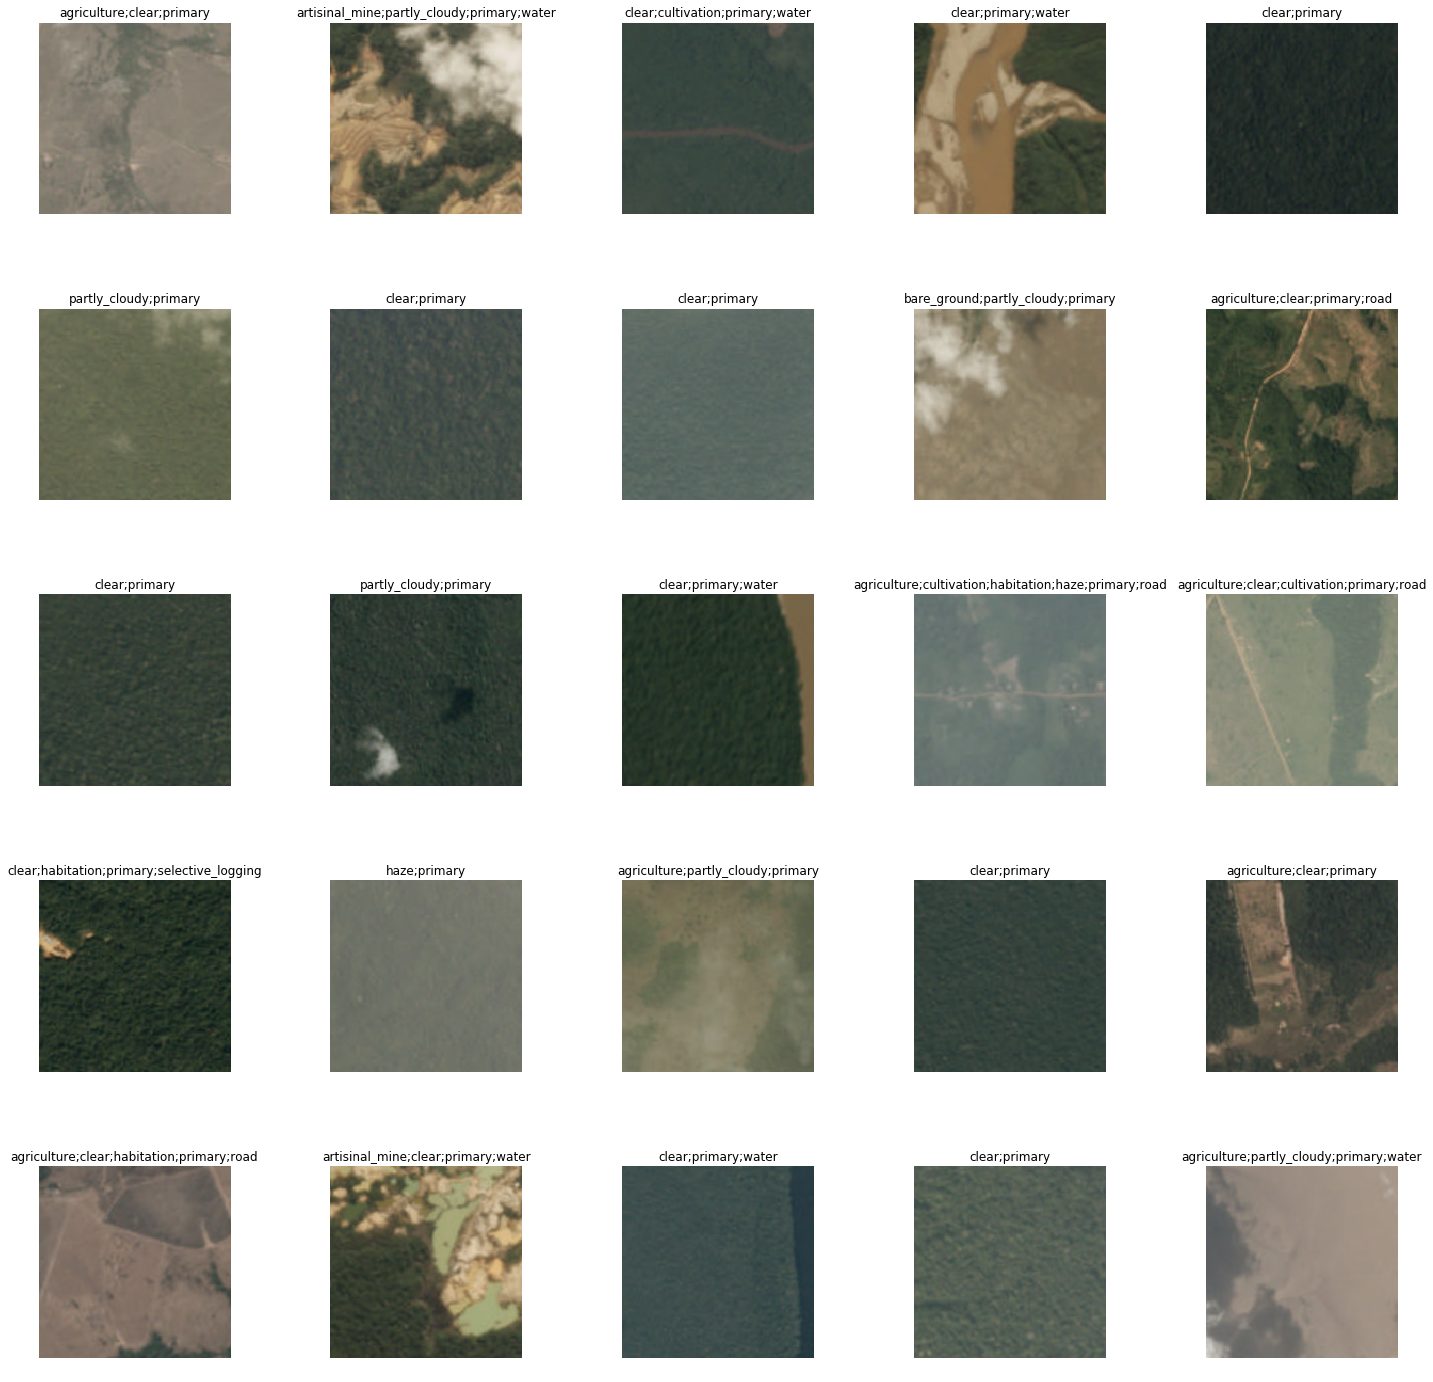

In [0]:
data.show_batch()

8. Créez un CNN learner. Par soucis de rapidité, on utilisera cette fois un resnet18 comme architecture. Ajoutez ```accuracy_thresh```comme metrics. Plus d'informations ici : [accuracy_thresh](https://docs.fast.ai/metrics.html#accuracy_thresh)

In [0]:
learn=cnn_learner(data,models.resnet18,metrics=accuracy_thresh)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-02
Min loss divided by 10: 2.51E-02


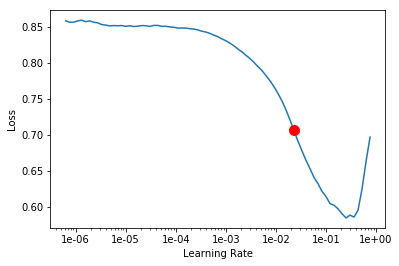

In [0]:
learn.recorder.plot(suggestion=True)

9. Notre metrics ```accuracy_thresh``` n'est pas encore très élevée, essayons d'entrainer le modèle pendant encore 4 epochs

In [0]:
learn.fit_one_cycle(21,2.29E-02)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.817393,0.731261,0.450000,00:01
1,0.783928,0.683403,0.600000,00:00
2,0.756473,0.668263,0.678571,00:00
3,0.711950,0.632154,0.721429,00:00
4,0.663761,0.518472,0.807143,00:00
5,0.602343,0.453582,0.846429,00:01
6,0.533874,0.445678,0.858929,00:01
7,0.479603,0.491319,0.851786,00:00
8,0.435579,0.445289,0.875000,00:00
9,0.399912,0.403937,0.882143,00:00


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.92E-05


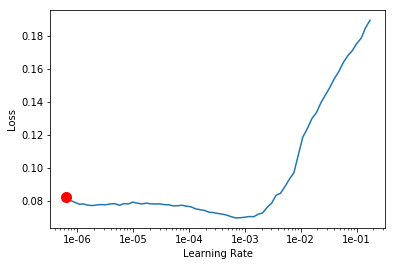

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(9,2.75E-06)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.079214,0.201716,0.932143,00:01
1,0.085417,0.199785,0.930357,00:01
2,0.080758,0.196651,0.930357,00:01
3,0.080267,0.195531,0.933929,00:01
4,0.078797,0.194316,0.933929,00:01
5,0.081276,0.193530,0.933929,00:01
6,0.080015,0.193294,0.935714,00:01
7,0.079788,0.191901,0.935714,00:01
8,0.080207,0.192110,0.933929,00:01


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-06
Min loss divided by 10: 6.92E-05


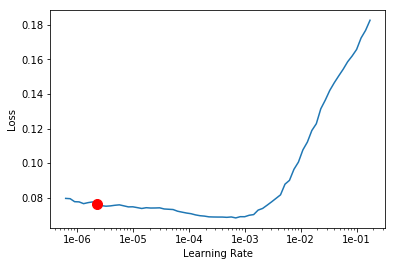

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(10,8.32E-04)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.087276,0.207314,0.926786,00:01
1,0.087510,0.226792,0.926786,00:01
2,0.087001,0.307802,0.900000,00:01
3,0.095252,0.371162,0.869643,00:01
4,0.100766,0.551513,0.850000,00:01
5,0.102248,0.446769,0.878571,00:01
6,0.100207,0.279185,0.910714,00:01
7,0.096857,0.371565,0.894643,00:01
8,0.094321,0.350218,0.901786,00:01
9,0.092457,0.303348,0.916071,00:01


10. Nos résultats commencent à être très statisfaisants ! Regardons les résultats via ```show_results```

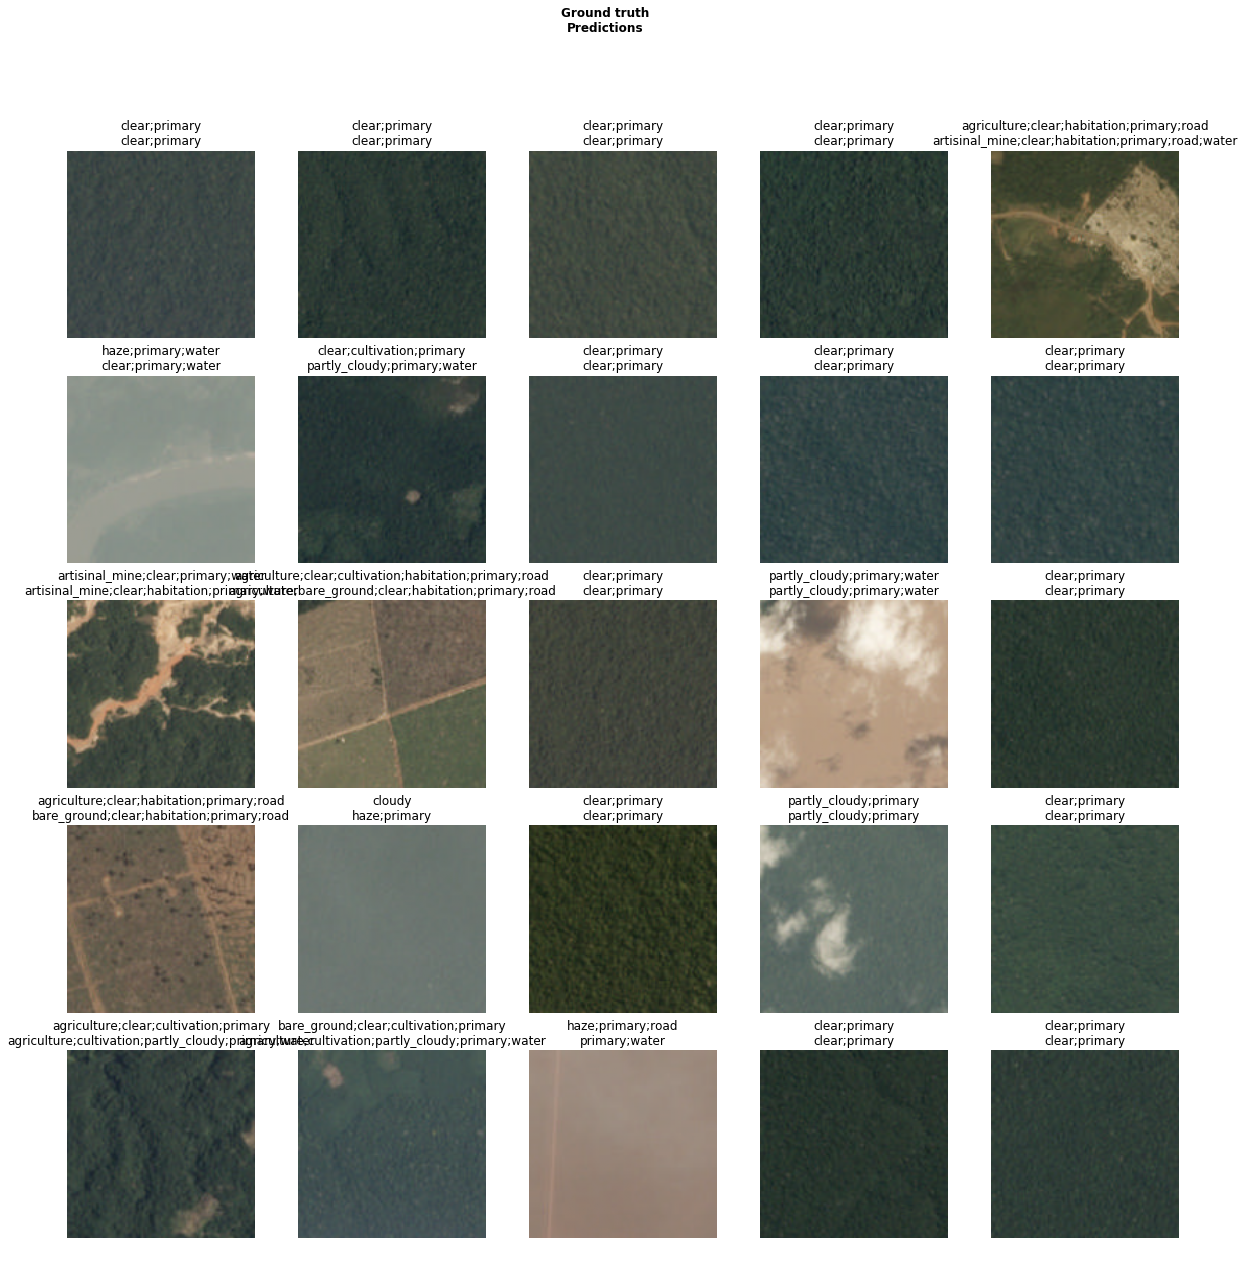

In [0]:
learn.show_results()

In [0]:
interp=ClassificationInterpretation.from_learner(learn)



1 misclassified samples over 40 samples in the validation set.


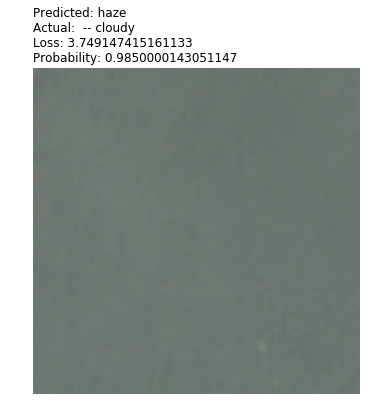

NoneType

In [0]:
interp.plot_multi_top_losses(figsize=(20,6))